In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

FILE_PATH = "cricket_data.csv"
OUTPUT_DIR = "ipl_analysis_results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [3]:
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)

    numeric_cols = [
        'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Balls_Faced', 'Batting_Strike_Rate',
        'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken', 'Economy_Rate'
    ]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [4]:
df = load_and_clean_data("C:/Users/adars/OneDrive/Desktop/cricket_data.csv")
df.head()

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,2024,Ruturaj Gaikwad,2.0,0.0,61.0,46,30.5,51.0,119.61,0,...,2.0,0.0,0.0,0.0,0,0,0.0,0,0,0
1,2023,Ruturaj Gaikwad,16.0,1.0,590.0,92,42.14,400.0,147.50,0,...,16.0,0.0,0.0,0.0,0,0,0.0,0,0,0
2,2022,Ruturaj Gaikwad,14.0,0.0,368.0,99,26.29,291.0,126.46,0,...,14.0,0.0,0.0,0.0,0,0,0.0,0,0,0
3,2021,Ruturaj Gaikwad,16.0,2.0,635.0,101*,45.35,466.0,136.26,1,...,16.0,0.0,0.0,0.0,0,0,0.0,0,0,0
4,2020,Ruturaj Gaikwad,6.0,2.0,204.0,72,51,169.0,120.71,0,...,6.0,0.0,0.0,0.0,0,0,0.0,0,0,0


In [5]:
def get_top_run_scorers(df, top_n=10):
    return df.groupby('Player_Name')['Runs_Scored'].sum().sort_values(ascending=False).head(top_n)

def get_economical_bowlers(df, top_n=10, min_balls=200):
    bowlers = df[df['Balls_Bowled'] >= min_balls]
    return bowlers.groupby('Player_Name')['Economy_Rate'].mean().sort_values().head(top_n)

def get_yearly_runs(df):
    return df.groupby('Year')['Runs_Scored'].sum()

def estimate_win_probability(df):
    team_stats = df.groupby('Year').agg({
        'Runs_Scored': 'sum',
        'Matches_Batted': 'sum'
    })
    team_stats['Avg_Runs_Per_Match'] = team_stats['Runs_Scored'] / team_stats['Matches_Batted']
    team_stats['Win_Probability'] = (team_stats['Avg_Runs_Per_Match'] - team_stats['Avg_Runs_Per_Match'].min()) / \
                                    (team_stats['Avg_Runs_Per_Match'].max() - team_stats['Avg_Runs_Per_Match'].min())
    return team_stats

In [6]:
top_scorers = get_top_run_scorers(df)
economical_bowlers = get_economical_bowlers(df)
yearly_runs = get_yearly_runs(df)
win_prob = estimate_win_probability(df)

top_scorers.head(3), economical_bowlers.head(3)


(Player_Name
 Virat Kohli       7361.0
 Shikhar Dhawan    6684.0
 David Warner      6426.0
 Name: Runs_Scored, dtype: float64,
 Player_Name
 Washington Sundar    5.960000
 Rashid Khan          6.647143
 Sunil Narine         6.795455
 Name: Economy_Rate, dtype: float64)

In [7]:
def plot_bar(data, title, xlabel, ylabel, filename, palette):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=data.values, y=data.index, palette=palette)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, filename))
    plt.show()  
    plt.close()

def plot_line(x, y, title, xlabel, ylabel, filename):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y, marker='o')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, filename))
    plt.show()
    plt.close()


C:\Users\adars\AppData\Local\Temp\ipykernel_21448\385013083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette=palette)


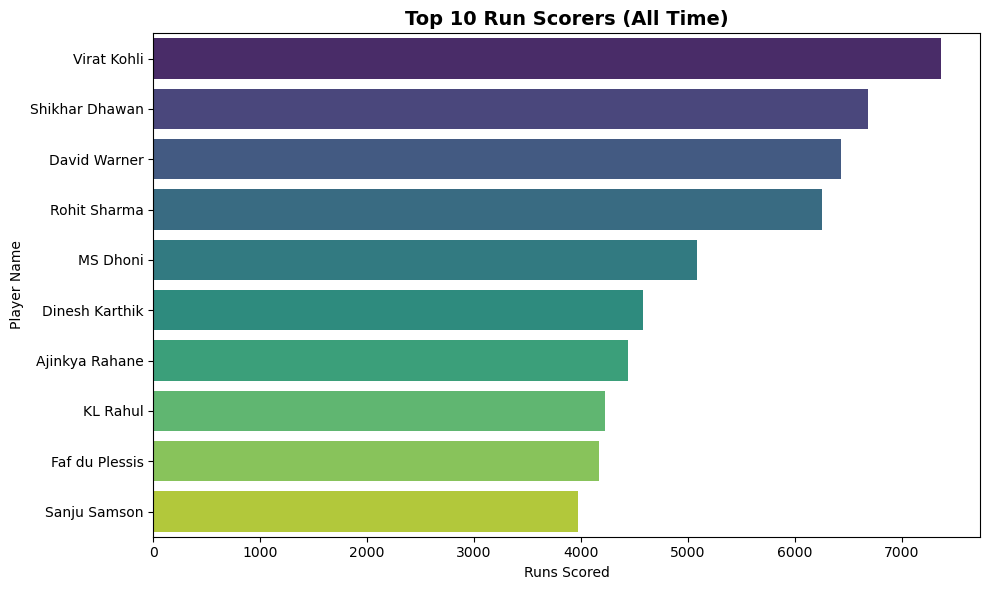

C:\Users\adars\AppData\Local\Temp\ipykernel_21448\385013083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette=palette)


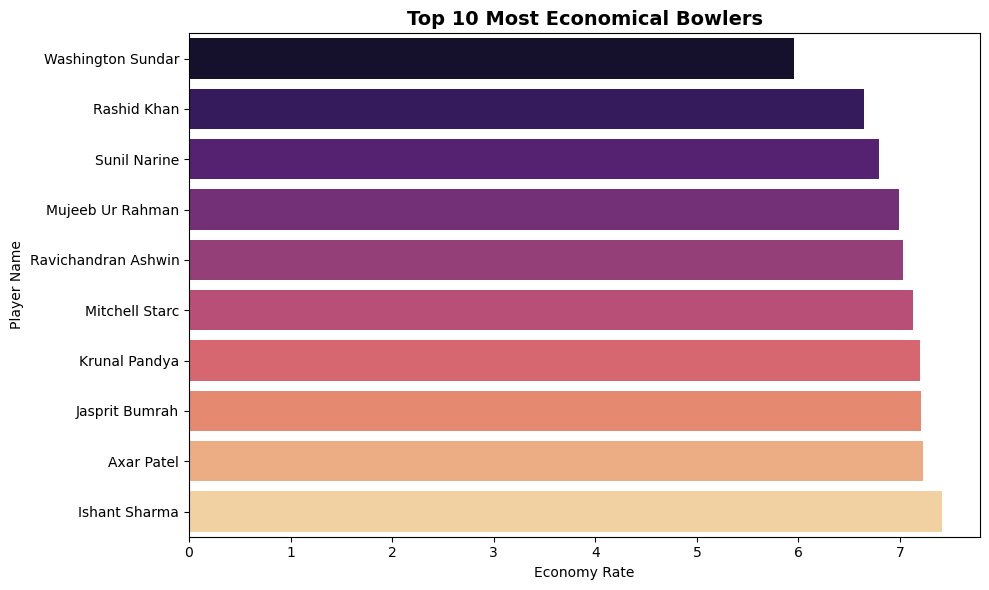

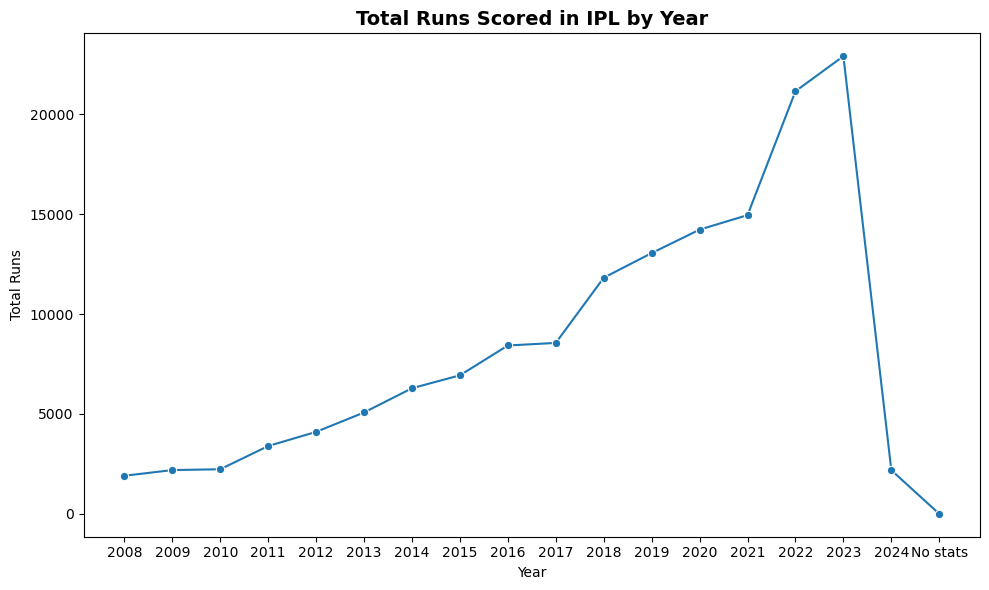

In [9]:
plot_bar(top_scorers, "Top 10 Run Scorers (All Time)", "Runs Scored", "Player Name", "top_run_scorers.png", "viridis")
plot_bar(economical_bowlers, "Top 10 Most Economical Bowlers", "Economy Rate", "Player Name", "economical_bowlers.png", "magma")
plot_line(yearly_runs.index, yearly_runs.values, "Total Runs Scored in IPL by Year", "Year", "Total Runs", "yearly_runs.png")


In [10]:
top_scorers.to_csv(os.path.join(OUTPUT_DIR, "top_run_scorers.csv"))
economical_bowlers.to_csv(os.path.join(OUTPUT_DIR, "economical_bowlers.csv"))
yearly_runs.to_csv(os.path.join(OUTPUT_DIR, "yearly_runs.csv"))
win_prob.to_csv(os.path.join(OUTPUT_DIR, "win_probability.csv"))


In [14]:
print("🏏 Top 3 Run Scorers:")
print(top_scorers.head(3))
print("\n🎯 Top 3 Economical Bowlers:")
print(economical_bowlers.head(3))
print("\n📊 Yearly Runs Trend:")
print(yearly_runs.tail(5))
print("\n📈 Win Probability (Sample):")
print(win_prob[['Avg_Runs_Per_Match', 'Win_Probability']].tail(5))

print(f"\n✅ Analysis complete! Results saved in '{OUTPUT_DIR}' folder.")


🏏 Top 3 Run Scorers:
Player_Name
Virat Kohli       7361.0
Shikhar Dhawan    6684.0
David Warner      6426.0
Name: Runs_Scored, dtype: float64

🎯 Top 3 Economical Bowlers:
Player_Name
Washington Sundar    5.960000
Rashid Khan          6.647143
Sunil Narine         6.795455
Name: Economy_Rate, dtype: float64

📊 Yearly Runs Trend:
Year
2021        14956.0
2022        21161.0
2023        22914.0
2024         2185.0
No stats        0.0
Name: Runs_Scored, dtype: float64

📈 Win Probability (Sample):
          Avg_Runs_Per_Match  Win_Probability
Year                                         
2021               14.436293         0.561987
2022               15.334058         0.956987
2023               14.679052         0.668797
2024               14.096774         0.412605
No stats                 NaN              NaN

✅ Analysis complete! Results saved in 'ipl_analysis_results' folder.
